# Your Task

__FROM:__ Kathy Narim-Nomstrom <br/>
__Subject:__ Time for a deep dive into the submetering data<br/>

Hi,

First, good work on the Data Science process. I think it's given our client a lot of confidence in how we'll get the work done.

Now that you've taken an initial look at the sub-metered household data, it's time to dive much deeper. I'd like you to __begin by exploring some visualizations of the data and then to build predictive models that will demonstrate to our client how the data can be used to help a home owner to make decisions about altering power consumption.__ To provide immediate value, I'd also like you to 
__provide the client with five business suggestions based on insights__ that you glean from your analysis.

Please __package your recommendations as a PowerPoint presentation__, again remembering that it is for a business, not a technical, audience. I'm looking forward to seeing your work. 

Kathy<br/>
VP, IOT Analytics

# Plan of Attack

# Import Standard Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas.plotting import register_matplotlib_converters

mpl.rcParams['font.size']=14
mpl.rcParams['figure.facecolor']='white'

## Introduction

Kathy has asked you to perform an in-depth analysis of the power consumption dataset. You will accomplish this via __data visualization and time series regression modeling__. As a first step, you will learn the importance of granularity and how subset your data into meaningful time periods. Then you will explore the data using visualization techniques, and you will select the most information-laden visualizations to present eventually to your client. __You will then develop three different time series regression models and work with seasonal and non-seasonal forecasting.__ Finally, you'll summarize your analysis and make recommendations in a final report to your client.

__Your deliverable for this task will be a PowerPoint presentation__ aimed at a business, rather than technical, audience.

# Visualize the Data

Before diving into a regression analysis of the energy consumption data, begin your analytical process by using visualization techniques to gain a deeper understanding of the data and to identify possible patterns to pursue via your regression analysis (or analysis using other techniques).

In this step, you will learn to subset your data, adjust granularity and create visualizations of your subsets. If the sub-meters contain useful information, the visualizations should help the homeowner understand their power usage patterns.

### Granularity

One of the goals of subsetting for visualizations is to adjust granularity to maximize the information to be gained. Granularity describes the frequency of observations within a time series data set. From the data description we know that the observations were taken once per minute over the period of almost 4 years. That's over 2 million observations. 

Let’s do a quick experiment to demonstrate the need for adjusting granularity. Use the dataset you created in Task 1 that contains observations from 2007, 2008 and 2009.

In [5]:
def fetch_data():
    """
    fetch the submeter data and run some pre-processing routines we developed in task 1
    Returns: df
    """
    import mysql.connector
    
    #Setup db pool connection
    host = 'data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com'
    user = 'deepAnalytics'
    passwd = 'Sqltask1234!'

    con = mysql.connector.connect(host = host,
                                  user = user,
                                  passwd = passwd)
                                  #dbname = 'dataanalytics2018')
    cursor = con.cursor()
    
    # select db of interest to use
    cursor.execute("USE dataanalytics2018")
                   
    # fetch list of tables in df
    df_table_list = pd.read_sql("SHOW TABLES", con=con)
    
    #pull data for each table
    df= pd.DataFrame()
    for i in range(1,df_table_list.shape[0]):
        df_subset = pd.read_sql('SELECT Date, Time, Sub_metering_1, Sub_metering_2, Sub_metering_3 FROM '+df_table_list.loc[i][0], con=con)
        df = pd.concat((df, df_subset)).reset_index(drop=True)
        
    # Combine Date and Time attribute values in a new attribute column
    df['DateTime'] = pd.to_datetime(df['Date']+' '+df['Time'])
    
    ## Move the DateTime attribute within the dataset
    df = df.reindex(columns=['Date','Time','DateTime','Sub_metering_1','Sub_metering_2','Sub_metering_3'])
    
    # Set data-time format
    df['DateTime'] = df['DateTime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Paris')
    df = df.sort_values('DateTime')
    
    #build some time unit columns
    df['Year'] = df['DateTime'].map(lambda x: x.year)
    df['Month'] = df['DateTime'].map(lambda x: x.month)
    df['Day'] = df['DateTime'].map(lambda x: x.day)
    df['Week'] = df['DateTime'].map(lambda x: x.week)
    df['Year-Month'] = pd.to_datetime(df['Year'].astype('str')+'-'+df['Month'].astype('str'))

    return df

df = fetch_data()

In [6]:
df

Date      Time                  DateTime  Sub_metering_1  \
0        2006-12-16  17:24:00 2006-12-16 18:24:00+01:00             0.0   
1        2006-12-16  17:25:00 2006-12-16 18:25:00+01:00             0.0   
2        2006-12-16  17:26:00 2006-12-16 18:26:00+01:00             0.0   
3        2006-12-16  17:27:00 2006-12-16 18:27:00+01:00             0.0   
4        2006-12-16  17:28:00 2006-12-16 18:28:00+01:00             0.0   
5        2006-12-16  17:29:00 2006-12-16 18:29:00+01:00             0.0   
6        2006-12-16  17:30:00 2006-12-16 18:30:00+01:00             0.0   
7        2006-12-16  17:31:00 2006-12-16 18:31:00+01:00             0.0   
8        2006-12-16  17:32:00 2006-12-16 18:32:00+01:00             0.0   
9        2006-12-16  17:33:00 2006-12-16 18:33:00+01:00             0.0   
10       2006-12-16  17:34:00 2006-12-16 18:34:00+01:00             0.0   
11       2006-12-16  17:35:00 2006-12-16 18:35:00+01:00             0.0   
12       2006-12-16  17:36:00 2006-12-16 18:36:00+01:00             0.0   
13       2006-12-16  17:37:00 2006-12-16 18:37:00+01:00             0.0   
14       2006-12-16  17:38:00 2006-12-16 18:38:00+01:00             0.0   
15       2006-12-16  17:39:00 2006-12-16 18:39:00+01:00             0.0   
16       2006-12-16  17:40:00 2006-12-16 18:40:00+01:00             0.0   
17       2006-12-16  17:41:00 2006-12-16 18:41:00+01:00             0.0   
18       2006-12-16  17:42:00 2006-12-16 18:42:00+01:00             0.0   
19       2006-12-16  17:43:00 2006-12-16 18:43:00+01:00             0.0   
20       2006-12-16  17:44:00 2006-12-16 18:44:00+01:00             0.0   
21       2006-12-16  17:45:00 2006-12-16 18:45:00+01:00             0.0   
22       2006-12-16  17:46:00 2006-12-16 18:46:00+01:00             0.0   
23       2006-12-16  17:47:00 2006-12-16 18:47:00+01:00             0.0   
24       2006-12-16  17:48:00 2006-12-16 18:48:00+01:00             0.0   
25       2006-12-16  17:49:00 2006-12-16 18:49:00+01:00             0.0   
26       2006-12-16  17:50:00 2006-12-16 18:50:00+01:00             0.0   
27       2006-12-16  17:51:00 2006-12-16 18:51:00+01:00             0.0   
28       2006-12-16  17:52:00 2006-12-16 18:52:00+01:00             0.0   
29       2006-12-16  17:53:00 2006-12-16 18:53:00+01:00             0.0   
...             ...       ...                       ...             ...   
2049250  2010-11-26  20:33:00 2010-11-26 21:33:00+01:00             0.0   
2049251  2010-11-26  20:34:00 2010-11-26 21:34:00+01:00             0.0   
2049252  2010-11-26  20:35:00 2010-11-26 21:35:00+01:00             0.0   
2049253  2010-11-26  20:36:00 2010-11-26 21:36:00+01:00             0.0   
2049254  2010-11-26  20:37:00 2010-11-26 21:37:00+01:00             0.0   
2049255  2010-11-26  20:38:00 2010-11-26 21:38:00+01:00             0.0   
2049256  2010-11-26  20:39:00 2010-11-26 21:39:00+01:00             0.0   
2049257  2010-11-26  20:40:00 2010-11-26 21:40:00+01:00             0.0   
2049258  2010-11-26  20:41:00 2010-11-26 21:41:00+01:00             0.0   
2049259  2010-11-26  20:42:00 2010-11-26 21:42:00+01:00             0.0   
2049260  2010-11-26  20:43:00 2010-11-26 21:43:00+01:00             0.0   
2049261  2010-11-26  20:44:00 2010-11-26 21:44:00+01:00             0.0   
2049262  2010-11-26  20:45:00 2010-11-26 21:45:00+01:00             0.0   
2049263  2010-11-26  20:46:00 2010-11-26 21:46:00+01:00             0.0   
2049264  2010-11-26  20:47:00 2010-11-26 21:47:00+01:00             0.0   
2049265  2010-11-26  20:48:00 2010-11-26 21:48:00+01:00             0.0   
2049266  2010-11-26  20:49:00 2010-11-26 21:49:00+01:00             0.0   
2049267  2010-11-26  20:50:00 2010-11-26 21:50:00+01:00             0.0   
2049268  2010-11-26  20:51:00 2010-11-26 21:51:00+01:00             0.0   
2049269  2010-11-26  20:52:00 2010-11-26 21:52:00+01:00             0.0   
2049270  2010-11-26  20:53:00 2010-11-26 21:53:00+01:00             0.0   
2049271  2010-11-26  20:54:00 2010-11-26

/Users/johnleonard/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


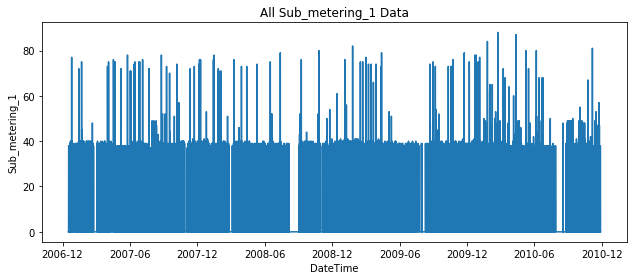

In [7]:
# Plot all of sub-meter 1 data
plt.title('All Sub_metering_1 Data')
x_label = 'DateTime'
y_label = 'Sub_metering_1'
plt.plot(df[x_label],df[y_label],'-')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.tight_layout(rect=(0,0,1.5,1))
plt.show()

Over 1,500,000 minutes from the beginning of 2007 though the end of 2009 have been plotted in this visualization. Can you extract useful information from this “brick”? Probably not. Reducing the number of plot points (granularity) would greatly benefit this visualization.

### Subsetting and Meaningful Time Periods

Another possible goal of subsetting is to focus on periods of time that highlight patterns of power usage. For this project, a week is a good period of time to visualize because people display different behaviors during the course of a week. Some work weekdays and have weekends off. Some have specific days when laundry is done. Etc. 

Let’s create a sub-set containing all of the observations from single week using the dplyr package filter command and then plot sub-meter 1. 

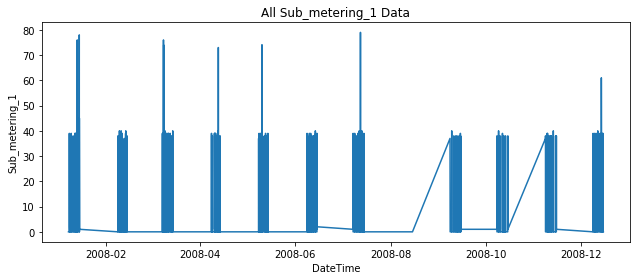

In [8]:
# add week per month (week per year already existst)
df['Week/Month'] = df['DateTime'].apply(lambda d: (d.day-1) // 7 + 1)

#slice out second week of 2008 and plot
df_subset = df[(df['Week/Month']==2) & (df['Year']==2008)]

#plot the subset
plt.title('All Sub_metering_1 Data')
x_label = 'DateTime'
y_label = 'Sub_metering_1'
plt.plot(df_subset[x_label],df_subset[y_label],'-')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.tight_layout(rect=(0,0,1.5,1))
plt.show()

There are lots of patterns to be learned from a week, but the granularity has to be right to extract this information. The ‘week’ plot above has over 10,000 observations and this granularity should probably be reduced.

### Visualize a Single Day with Plotly

Now that we have explored some basic plotting, granularity and meaningful time periods we will move on to using a more advanced visualization package called plotly. The documentation for a basic line plot can be found [here](https://plot.ly/python/line-charts/). Don't forget that you may need to install this package. 

In [9]:
#!pip install plotly

import plotly
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

Let's subset a single day so that we can visualize the power usage behaviors in the sub-metered home. 

In [10]:
df_subset = df[(df['Year'] == 2008) & 
               (df['Month'] == 1) & 
               (df['Day'] == 9)]

#plot the subset
def plotly_plot(df, x_label, y_label):
    trace = go.Scatter(x = df[x_label],
                       y = df[y_label])
    layout = dict(xaxis = dict(title = x_label),
                  yaxis = dict(title = y_label))
    fig = dict(data = [trace], layout = layout)
    py.iplot(fig)
    
x_label = 'DateTime'
y_label = 'Sub_metering_1'
plotly_plot(df_subset, x_label, y_label)

As you can see, line plots and Plotly make much better visualizations than the basic plot function. But, does this plot make sense? What does sub-meter 1 correspond with in this home?

<font color= red> The code below defines the dictionary (dict) for each sub-metering field

In [11]:
sub_metering_dict = {'Sub_metering_1':'Kitchen(dishwasher,oven,microwave)',
                     'Sub_metering_2':'Laundry Room (washer,dryer,fridge,light)',
                     'Sub_metering_3':'Heat & AC'}

<font color= red> Sub_metering_1 corresponds to the kitchen. The plot above appears to indicate the kitchen is used mostly around 16:00 (4pm) and 17:00 (5pm). This doesn't seem out of the ordinary, though it is a bit strange it isn't used at other times in the day

Perhaps the best way to understand the power usage on this day is to plot all three sub-meters to gain a perspective on all of the power being consumed. While we're at it let's add a legend, title and axis labels.  

In [12]:
#plot the subset
def plotly_plot(df, x_label, y_labels, y_header, plt_title=''):
    traces = []
    for y_label in y_labels:
        traces.append(go.Scatter(x = df[x_label],
                                 y = df[y_label],
                                 name = y_label))
        
    layout = dict(title=go.layout.Title(text= plt_title),
                    xaxis = dict(title = x_label),
                  yaxis = dict(title = y_header))
    fig = dict(data = traces, layout = layout)
    py.iplot(fig)
    
x_label = 'DateTime'
y_labels = ['Sub_metering_1','Sub_metering_2','Sub_metering_3']
plotly_plot(df_subset, x_label, y_labels, y_header='Power (W-Hrs)')

### Reducing Granularity

The plot above is pretty grainy given that 1440 points have been plotted. Let’s experiment and see if we can get a better plot by reducing the granularity from one observation per minute to one observation every 10 minutes. To do this we’ll need to use filter again and create a new sub-set.

In [13]:
df['Minute'] = df['DateTime'].map(lambda x: x.minute)

In [14]:
df_subset = df[(df['Year'] == 2008) & 
               (df['Month'] == 1) & 
               (df['Day'] == 9) &  
               ((df['Minute'] == 0) | (df['Minute'] == 10) | (df['Minute'] == 20) | (df['Minute'] == 30) | (df['Minute'] == 40) | (df['Minute'] == 50))]

In [15]:
x_label = 'DateTime'
y_labels = ['Sub_metering_1','Sub_metering_2','Sub_metering_3']
plotly_plot(df_subset, x_label, y_labels, y_header='Power (W-Hrs)')

In [16]:
sub_metering_dict

{'Sub_metering_1': 'Kitchen(dishwasher,oven,microwave)',
 'Sub_metering_2': 'Laundry Room (washer,dryer,fridge,light)',
 'Sub_metering_3': 'Heat & AC'}

With the granularity adjusted we get a much more clear picture of the power consumption on January 9th. So what can you learn from this visualization? Your analysis could include answers to the following...

__What peaks might represent the water heater?__
__How about the AC?__

<font color= red> the water heater and AC (sub_metering_3) show distinct peaks in the morning and at night. This likely corresponds to people showering/bathing, which would be the water heater consuming power. After that, these people seem to use the heater (if it's winter) or AC (if it's summer) all morning, then in the afternoon when the temperature is more stable outside, they turn the heat/AC off, until nigth when they shower, then go to bed with the heat/AC off

__What could be happening in the laundry room?__

<font color= red> the laundry room (meter 2) seems to have small peaks roughly every 2 hrs. This could correspond the fridge turning on for cooling, or perhaps some light turning on/off automatically.

__How many times during this day are kitchen appliances being used?__

<font color=red> 2 times, at 4:30 and 5:20pm

__In your opinion, does the data from these three sub-meters contain useful information for the homeowner?__

<font color=red>Seems pretty useful

### Produce Two More Visualizations

Now that you understand the workflow, it’s your turn to create two additional visualizations to compliment one that features "Day". All three visualizations along with your analysis will be needed for your report to the homebuilder. 

#### Visualizations needed for your report

1. The Day day visualization you built in the walkthrough above

In [17]:
x_label = 'DateTime'
y_labels = ['Sub_metering_1','Sub_metering_2','Sub_metering_3']
plotly_plot(df_subset, x_label, y_labels, y_header='Power (W-Hrs)')

2. Create a visualization with plotly for a Week of your choosing. Use all three sub-meters and make sure to label. Experiment with granularity. 

In [18]:
df.columns

Index(['Date', 'Time', 'DateTime', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Year', 'Month', 'Day', 'Week', 'Year-Month',
       'Week/Month', 'Minute'],
      dtype='object')

In [21]:
for week in range(1,df[ 'Week/Month'].max()):
    df_subset = df[(df['Year'] == 2008) & 
                   (df['Month'] == 1) &
                   (df[ 'Week/Month'] == week) &  
                   ((df['Minute'] == 0) | (df['Minute'] == 10) | (df['Minute'] == 20) | (df['Minute'] == 30) | (df['Minute'] == 40) | (df['Minute'] == 50))]
    x_label = 'DateTime'
    y_labels = ['Sub_metering_1','Sub_metering_2','Sub_metering_3']
    plotly_plot(df_subset, x_label, y_labels, y_header='Power (W-Hrs)', 
                plt_title='Week/Month:'+ str(week))

3. Create a visualization for a time period of your choice. Both "Day" and "Week" highlight typical patterns in a home. What might be another period of time that could provide insights? Use plotly and experiment with granularity until you find the visualization that maximizes information gain for the viewer. 

In [18]:
year = 2008
group_list = ['Month','Week','Day']
df_subset = df[(df['Year'] == year) ].groupby(group_list).mean().reset_index()
df_subset['DateTime'] = pd.to_datetime(df_subset[['Year','Month','Day']])
df_subset = df_subset.sort_values('DateTime')

label = 'DateTime'
y_labels = ['Sub_metering_1','Sub_metering_2','Sub_metering_3']
plotly_plot(df_subset, x_label, y_labels, y_header='Power (W-Hrs)', 
            plt_title='Year:'+ str(year)+'| mean for '+str(group_list))

In [19]:
year = 2008
group_list = ['Month','Week']
df_subset = df[(df['Year'] == year) ].groupby(group_list).mean().reset_index()
df_subset['DateTime'] = pd.to_datetime(df_subset[['Year','Month','Day']])
df_subset = df_subset.sort_values('DateTime')

label = 'DateTime'
y_labels = ['Sub_metering_1','Sub_metering_2','Sub_metering_3']
plotly_plot(df_subset, x_label, y_labels, y_header='Power (W-Hrs)', 
            plt_title='Year:'+ str(year)+'| mean for '+str(group_list))

### Optional Work 

* Produce pie chart visualizations that are likely to provide insight, e.g.,
     * Percentage of total use at various times of day by each sub-meter.

In [20]:
df['Hour'] = df['DateTime'].dt.hour.astype(int)

In [21]:
# Calculate sum of power per day for each sub_meter
df_sum_per_day = df.groupby(['Year','Month','Week','Day']).sum().reset_index().drop(columns=['Week/Month','Minute','Hour'])

for i in range(1,4):
    df_sum_per_day = df_sum_per_day.rename(columns={'Sub_metering_'+str(i):'Sum(Sub_metering_'+str(i)+')/Day'})

# Sum power per hour
df_subset = df.groupby(['Year','Month','Week','Day','Hour']).sum().reset_index()

# merge with original df
df_subset = pd.merge(df_subset,df_sum_per_day,on=['Year','Month','Week','Day']).reset_index(drop=True)

# calculate % (total pwr per hour / total pwr per day)
for i in range(1,4):
    df_subset['Sub_metering_'+str(i)+'%(total hourly pwr / total daily pwr)'] = 100*df_subset['Sub_metering_'+str(i)]/df_subset['Sum(Sub_metering_'+str(i)+')/Day']
    
#Select year of interest
df_subset = df_subset[(df_subset['Year']==year) &
                      (df_subset['Month'] == 1) & 
                      (df_subset['Day'] == 9)]

#Plot pie chart
for i in range(1,4):
    label = 'Sub_metering_'+str(i)+'%(total hourly pwr / total daily pwr)'
    print('\t\t-------',label,'------')
    df_filtered = df_subset[df_subset[label ]>0]
    labels = df_filtered['Hour']
    values = df_filtered[label]
    
    trace = go.Pie(labels=labels, values=values)

    py.iplot([trace], filename='basic_pie_chart')

		------- Sub_metering_1%(total hourly pwr / total daily pwr) ------


		------- Sub_metering_2%(total hourly pwr / total daily pwr) ------


		------- Sub_metering_3%(total hourly pwr / total daily pwr) ------


* Percentage of total power use over a day by each sub-meter.

In [22]:
#Plot pie chart
display(df_subset[['Year','Month','Day']].iloc[0,:])
labels = ['Sub_metering_'+str(i) for i in range(1,4)]
values = []
for label in labels:
    values.append(df_subset[label].sum())

values = values / np.sum(values)
trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

Year     2008
Month       1
Day         9
Name: 9255, dtype: int64

* Percentage of total power use over an entire year by each sub-meter.

In [23]:
df_subset = df.groupby(['Year']).sum().reset_index()[['Year','Sub_metering_1','Sub_metering_2','Sub_metering_3']]

#Select year of interest
df_subset = df_subset[(df_subset['Year']==year)]
display(df_subset)

#Plot pie chart
labels = ['Sub_metering_'+str(i) for i in range(1,4)]
values = []
for label in labels:
    values.append(df_subset[label].sum())

values = values / np.sum(values)
trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

Year  Sub_metering_1  Sub_metering_2  Sub_metering_3
2  2008        584784.0        661877.0       3180254.0

# Prepare to Analyze the Data

With your initial visualizations complete it's time to prepare the data for Time Series Analysis. If needed, you may want to brush up on what a Time Series is using the links in the Task One plan of attack. 

## Complete a tutorial on time series analysis

It is highly recommended that you work through the tutorial in The [Little Book of R](https://a-little-book-of-r-for-time-series.readthedocs.org/en/latest/) for Time Series (also available as a PDF). 

## Store your data frame(s) as time series


Store the data in a time series with appropriate start, end, and frequency. As in the previous step, think about the choosing a sample that makes sense for your ultimate report. Do you need all of the data, or can it be sampled? If so, at what frequency?

Although you can create a subset and store a time series object with many different frequencies (granularity), we will walk through sub-meter 3 with a frequency of 52 weekly observations per year. The example in the Little Book of R for Time Series uses a frequency of 12. After you have worked through the plan of attack with a frequency of 52, consider exploring the other sub-meters with other frequencies. You can learn more about seasonal periods and frequency at this blog post. 

Let's subset the data and then create a Time Series object using the ts() function.

In [24]:
df.columns

Index(['Date', 'Time', 'DateTime', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Year', 'Month', 'Day', 'Week', 'Year-Month',
       'Week/Month', 'Minute', 'Hour'],
      dtype='object')

In [25]:
#add day of week column
df['Day/Week'] = df['DateTime'].dt.dayofweek

# Subset to one observation per week on Mondays at 8:00pm for 2007, 2008 and 2009
df_subset = df[(df['Day/Week']==2) & (df['Hour']==20) & (df['Minute']==1)]

#select only submeter 3
df_subset = df_subset.drop(columns=['Sub_metering_1','Sub_metering_2'])

#group by week
df_subset = df_subset.groupby(['Year','Month','Week']).mean().reset_index()

#add back date time stamp
df_subset['DateTime'] = pd.to_datetime(df_subset[['Year','Month','Day']])


TIP:
"Sometimes time series data has been collected at regular intervals that were less than one year, for example, daily, monthly or quarterly. In this case, you can specify the number of times that data was collected per year by using the ‘frequency’ parameter in the ts() function." -- A Little Book of R for Time Series, p. 12.

## Produce time series plots

Once you have read and stored a time series and properly addressed the date and time attributes, the next step is usually to make one or more plots of the time series data. Let's experiment with a couple of plotting functions. 

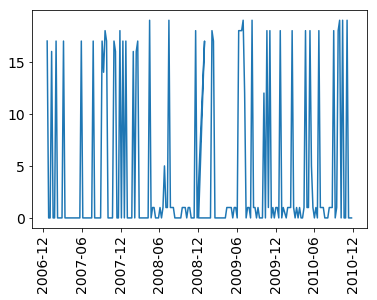

In [26]:
# Plot sub-meter 3 with matplotlib (you may need to install these packages)
plt.plot(df_subset['DateTime'],df_subset['Sub_metering_3'])
plt.xticks(rotation='vertical')
plt.show()

In [27]:
# Plot sub-meter 3 with plotly
plotly_plot(df_subset,'DateTime',['Sub_metering_3'],'Watt-Hours',plt_title='Sub_metering_3')

Review your plots. Which do you prefer? Why? Make any parameter changes you need to match the aesthetic formatting of your report.

<font color='red'> Generally plotly has better aesthetics, however building the plots requires a bit more complexity than matplotlib.

## Produce Two More Visualizations
It’s your turn to create two additional ts objects and plot them to compliment sub-meter 3 from above. All three visualizations along with your analysis will be needed for your report to the homebuilder. 

__Visualizations needed for your report__

1. The sub-meter 3 plot you built in the walkthrough above

In [28]:
# Plot sub-meter 3 with plotly
plotly_plot(df_subset,'DateTime',['Sub_metering_3'],'Watt-Hours',plt_title='Sub_metering_3')

2. Sub-meter 1 with your choice of frequency and time period

3. Sub-meter 2 with your choice of frequency and time period

In [29]:
# Subset to one observation per week on Mondays at 8:00pm for 2007, 2008 and 2009
df_subset = df

#group by week
df_subset = df_subset.groupby(['Year','Month','Week']).mean().reset_index()


#add back date time stamp
df_subset['DateTime'] = pd.to_datetime(df_subset[['Year','Month','Day']])

df_subset = df_subset.sort_values('DateTime')

# Plot sub-meter 3 with plotly
plotly_plot(df_subset,'DateTime',['Sub_metering_1','Sub_metering_2','Sub_metering_3'],'Watt-Hours',
            plt_title='mean power consumption per weeek')

TIP:
The dataset contains some missing values in the measurements. All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007. This percentage can be disregarded since it will not statistically affect the general patterns on energy consumption.

# Forecasting a Time Series

When using regression for prediction, we are often considering time series data with the aim of forecasting the future. A common property of time series data is trend; using regression we can model and forecast the trend in time series data.

In this step you will create three different time series linear models -- for three different time periods -- using the statsmodels api, and you will forecast the trends of each time series model you create. You can find more time series analysis information at:
* [An End-to-End Project on Time Series Analysis and Forecasting with Python](https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b)
* [How to Create an ARIMA Model for Time Series Forecasting in Python](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)
* [A Gentle Introduction to SARIMA for Time Series Forecasting in Python](https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/)

We will continue to use the sub-meter 3 time series object we created in the previous step. 

## Sub-Meter 3 Analysis

In [30]:
def build_sub_meter_3_subset(df):

    #add day of week column
    df.index = df['DateTime']
    
    # Subset to one observation per week on Mondays at 8:00pm for 2007, 2008 and 2009
    df_subset = df[(df['Day/Week']==2) & (df['Hour']==20) & (df['Minute']==1)]
    
    #select only submeter 3
    df_subset = df_subset.drop(columns=['Sub_metering_1','Sub_metering_2'])

    #resample by week (resample ensures the frequency of the averaging is written to the df. groupby does not assign such infromation)
    df_subset = df_subset.resample('W').mean()
    
    df_subset['Sub_metering_3'] = df_subset['Sub_metering_3'].fillna(0)
    
    df_subset.index = df_subset.index.tz_localize(None)
    
    return df_subset

df_subset = build_sub_meter_3_subset(df)

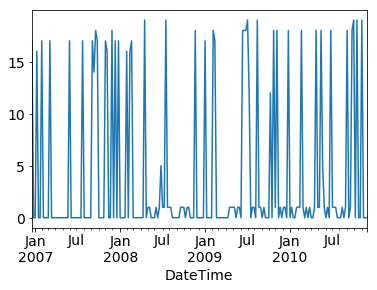

In [31]:
# build a series object just containing the sub meter data and the time stamps
ts_data = df_subset['Sub_metering_3']

ts_data.plot()
plt.show()

### Forecast using ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data. More specifically, p, d, q are defined as:
* p: The number of lag observations included in the model, also called the lag order.
* d: The number of times that the raw observations are differenced, also called the degree of differencing.
* q: The size of the moving average window, also called the order of moving average.

A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.

An ARIMA model can be created using the statsmodels library as follows:

Define the model by calling ARIMA() and passing in the p, d, and q parameters.
The model is prepared on the training data by calling the fit() function.
Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted.

Let’s start off with something simple. First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

When fitting the model, a lot of debug information is provided about the fit of the linear regression model. We can turn this off by setting the disp argument to 0.

In [32]:
import statsmodels.api as sm

pqd = (5,1,0)
model = sm.tsa.ARIMA(ts_data, order = pqd)
model_fit = model.fit(disp=0)

/Users/johnleonard/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/johnleonard/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/johnleonard/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an a

In [84]:
def plot_preds_and_Residuals(model_fit, model_type='ARIMA'):
    #print summary table
    print('--------Model Summary --------')
    display(model_fit.summary().tables[1])
    
    if model_type == 'ARIMA':
        model_fit.plot_predict()
        plt.show()
    
        # plot residuals
        residuals = model_fit.resid

        plt.title('residual error')
        residuals.plot()
        plt.show()

        #residuals distributions
        plt.title('residual error distribution')
        residuals.plot(kind='hist')
        plt.show()
    elif model_type == 'SARIMA':
        model_fit.get_prediction().predicted_mean.plot(label='pred')
        (model_fit.resid + model_fit.get_prediction().predicted_mean).plot(label='Sub_meter_data')
        plt.legend()
        plt.show()
        
        model_fit.plot_diagnostics()
        plt.tight_layout(rect=(0,0,3,2))
        plt.show()


--------Model Summary --------


<class 'statsmodels.iolib.table.SimpleTable'>

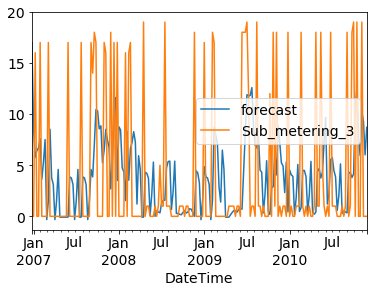

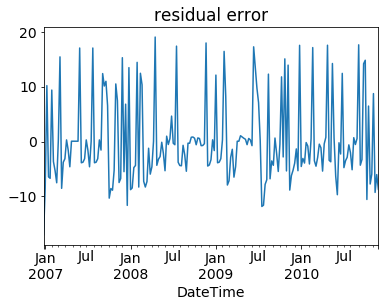

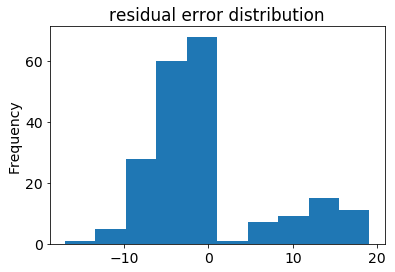

In [34]:
plot_preds_and_Residuals(model_fit)

Now let's perform a grid search of the pqd hyper parameters to find the best model

In [35]:
import warnings

warnings.filterwarnings('ignore')
pqd_mse = []
for p in range(0,10): #our data is groupby by weeks, so we will lag by 8 weeks at most
    for q in range(0,3):
        for d in range(0,3):
            try:
                pqd = (p,q,d)
                mse = np.mean((sm.tsa.ARIMA(ts_data, order = pqd).fit(disp=0).resid)**2)
                pqd_mse.append([p,q,d,mse])
            except:
                None
warnings.filterwarnings('default')
pqd_mse = pd.DataFrame(pqd_mse,columns=['p','q','d','mse']).sort_values('mse').reset_index(drop=True)

#display the top 5 best fits
pqd_mse.head()               

p  q  d        mse
0  8  0  2  44.465633
1  9  0  2  45.264578
2  9  0  1  46.022153
3  5  0  2  46.182476
4  4  0  2  46.184376

pqd_best [8, 0, 2]
--------Model Summary --------


<class 'statsmodels.iolib.table.SimpleTable'>

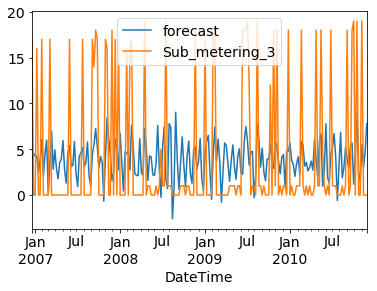

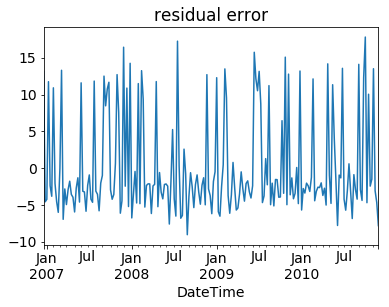

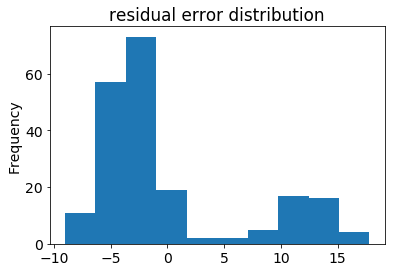

In [36]:
#fetch the best fit params
pqd_best = list(pqd_mse[['p','q','d']].iloc[0,:])
print('pqd_best',pqd_best)

#fit best model
model = sm.tsa.ARIMA(ts_data, order = pqd_best)
model_fit = model.fit(disp=0)

plot_preds_and_Residuals(model_fit)

### Forecasting Using SARIMA

As we can see above, the model isn't doing too well, even after the hyperparameter search. Let's try adding a seasonality component to the model using the SARIMA model, where "S" stands for Seasonal.

The SARIMA model can be broken into trend elements and seasonal elements.

The trend elements are defined by the same hyperparameters we used in ARIMA:
* p: Trend autoregression order.
* d: Trend difference order.
* q: Trend moving average order.

The seasonal elements are:
* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period.

As you may have guessed, m parameter influences the P, D, and Q parameters. For example, an m of 12 for monthly data suggests a yearly seasonal cycle.

Let's start by just evaluating a SARIMA model with some random PDQm parameters and the pdq_best condition we found in our ARIM grid search

/Users/johnleonard/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:1051: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



--------Model Summary --------


/Users/johnleonard/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.table.SimpleTable'>

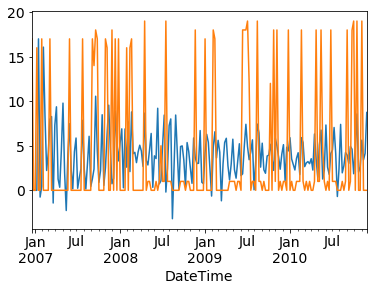

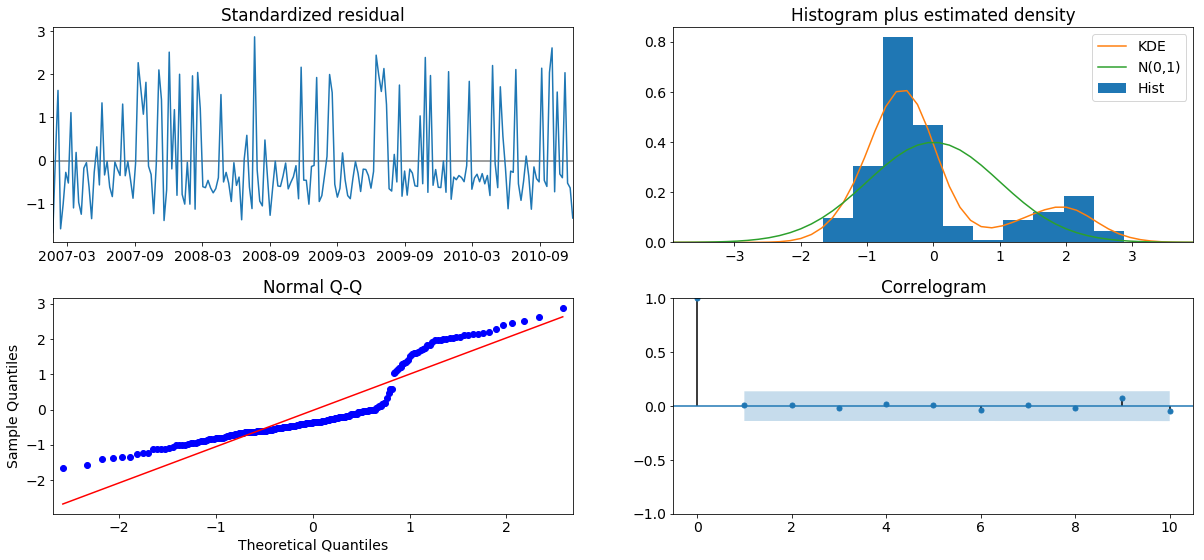

In [37]:
PQDm = (0,1,1,4)
model = sm.tsa.SARIMAX(ts_data, order = pqd_best, seasonal_order=(PQDm))
model_fit = model.fit(disp=0)

plot_preds_and_Residuals(model_fit, model_type='SARIMA')

Now let's run a grid search for SARIMA. To do this, we'll use parallel computing. The setup for this is a bit more complicated. Additional details for grid search using parallal computing can be found at:
* [How to Grid Search SARIMA Model Hyperparameters for Time Series Forecasting in Python](https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/)

First we start by defining our loss metric function:

In [38]:
def SARIMA_mse(ts_data, pqd, PQDm):
    warnings.filterwarnings('ignore')
    try:
        mse = np.mean((sm.tsa.SARIMAX(ts_data, order = pqd, seasonal_order=(PQDm)).fit(disp=0).resid)**2)
    except:
        mse = np.nan
    warnings.filterwarnings('default')
    
    output = (pqd, PQDm, mse)
    return output

#test the function out
SARIMA_mse(ts_data, pqd, PQDm)

((9, 2, 2), (0, 1, 1, 4), nan)

define the grid space we will search

In [48]:
pqdPQDm_list = []
for p in range(1,9):
    for q in range(0,3):
        for d in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    for D in range(0,3):
                        for m in range(0,7):
                            pqdPQDm_list.append([(p,q,d),(P,Q,D,m)])
                            
print('n tasks:',len(pqdPQDm_list))

n tasks: 13608


setup and run the parallel computing session. This may take a very long time to execute

In [49]:
#import joblib for parallel computing
import joblib
import joblib.executor

#setup the executor
def SARIMA_grid_search(ts_data, pqdPQDm_list):
    n_cpus = joblib.parallel.cpu_count()
    executor = joblib.parallel.Parallel(n_jobs = n_cpus, 
                                        verbose=10,
                                        backend='multiprocessing')

    #define the task
    tasks = (joblib.parallel.delayed(SARIMA_mse)(ts_data, pqd, PQDm) for [pqd, PQDm] in pqdPQDm_list)
    print('n tasks:',len(pqdPQDm_list))

    #execute the task
    pqdPQDm_mse = executor(tasks)
    
    return pqdPQDm_mse

pqdPQDm_mse = SARIMA_grid_search(ts_data, pqdPQDm_list)

n tasks: 13608


[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Batch computation too fast (0.0906s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  22 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done  88 tasks      | elapsed:    2.5s
[Parallel(n_jobs=8)]: Batch computation too slow (2.0531s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done 132 tasks      | elapsed:    3.7s
[Parallel(n_jobs=8)]: Batch computation too slow (2.0247s.) Setting batch_size=1.
[Parallel(n_jobs=8)]: Done 170 tasks      | elapsed:    5.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.0373s.) Setting batch_size=10.
[Parallel(n_jobs=8)]: Done 188 tasks      | elapsed:    5.4s
[Parallel(n_jobs=8)]: Done 261 tasks      | elapsed:    7.5s
[Parallel(n_jobs=8)]: Batch computat

[Parallel(n_jobs=8)]: Batch computation too slow (2.0564s.) Setting batch_size=1.
[Parallel(n_jobs=8)]: Done 6329 tasks      | elapsed:  6.8min
[Parallel(n_jobs=8)]: Done 6432 tasks      | elapsed:  7.0min
[Parallel(n_jobs=8)]: Done 6515 tasks      | elapsed:  7.1min
[Parallel(n_jobs=8)]: Done 6600 tasks      | elapsed:  7.5min
[Parallel(n_jobs=8)]: Batch computation too fast (0.1937s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Batch computation too fast (0.1864s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done 6743 tasks      | elapsed:  7.6min
[Parallel(n_jobs=8)]: Batch computation too slow (2.1093s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Batch computation too slow (2.0949s.) Setting batch_size=1.
[Parallel(n_jobs=8)]: Done 6910 tasks      | elapsed:  7.8min
[Parallel(n_jobs=8)]: Done 6997 tasks      | elapsed:  7.9min
[Parallel(n_jobs=8)]: Done 7086 tasks      | elapsed:  8.1min
[Parallel(n_jobs=8)]: Done 7175 tasks      | elapsed:  8.3min
[Parallel(n_jobs=8)]: Batch comp

In [58]:
#convert our list of results into a df
df_pqdPQDm_mse = pd.DataFrame(pqdPQDm_mse,columns = ['pqd','PQDm','mse'])

#sort by mse and inspect the top 5 best models
df_pqdPQDm_mse = df_pqdPQDm_mse.sort_values('mse').reset_index(drop=True)
df_pqdPQDm_mse.head()

pqd          PQDm        mse
0  (8, 0, 2)  (2, 0, 2, 3)  45.817499
1  (8, 0, 2)  (1, 0, 1, 3)  46.092336
2  (8, 0, 1)  (2, 0, 1, 5)  46.108364
3  (8, 0, 2)  (2, 0, 2, 1)  46.180293
4  (8, 0, 2)  (2, 0, 2, 0)  46.180293

Let's inspect our best model!

/Users/johnleonard/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:1051: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



--------Model Summary --------


/Users/johnleonard/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.table.SimpleTable'>

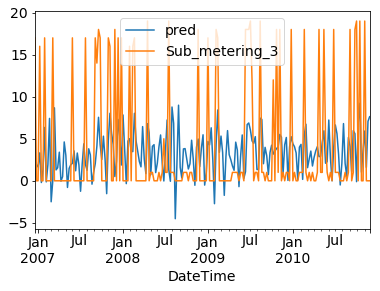

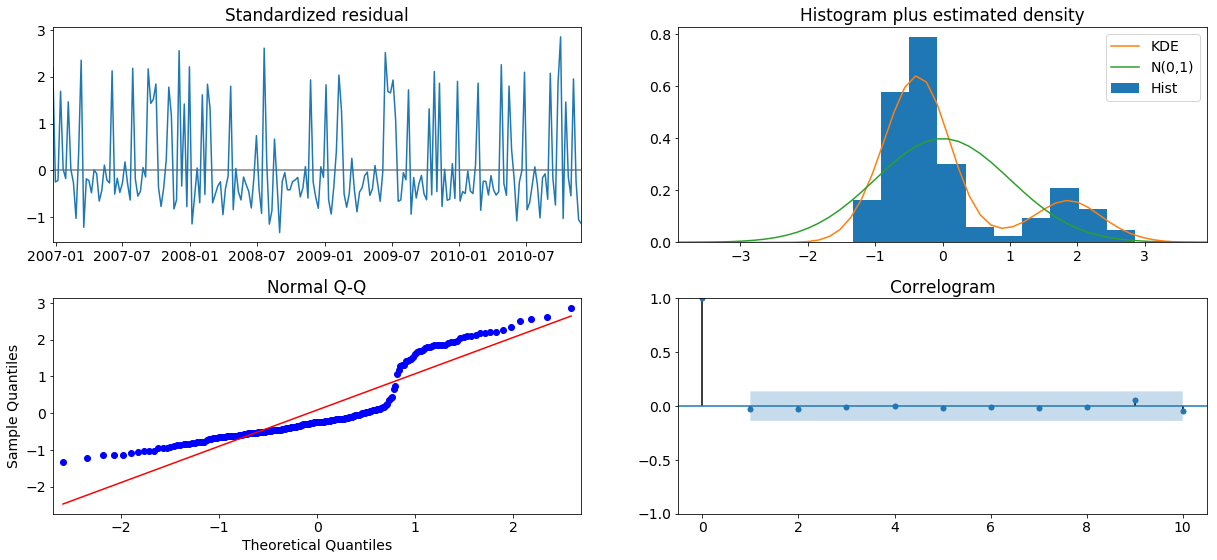

In [85]:
pqd_best = df_pqdPQDm_mse['pqd'][0]
PQDm_best = df_pqdPQDm_mse['PQDm'][0]

model = sm.tsa.SARIMAX(ts_data, order = pqd_best, seasonal_order=PQDm_best)
model_fit = model.fit(disp=0)

plot_preds_and_Residuals(model_fit, model_type='SARIMA')

### Forecast

Now lets create and plot a forecast. 

/Users/johnleonard/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning:

Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.



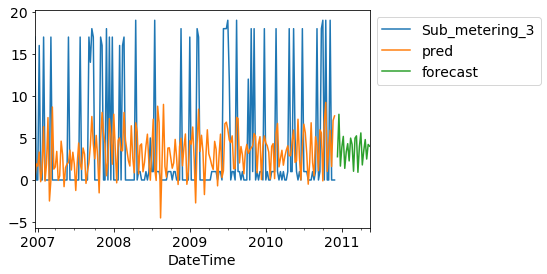

In [87]:
ts_data.plot()
model_fit.get_prediction().predicted_mean.plot(label='pred')
model_fit.get_forecast(steps=24).predicted_mean[1:].plot(label='forecast')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## Produce Two More Forecasts 

It’s your turn to create two additional forecasts and plot them to compliment sub-meter 3 from above. All three visualizations along with your analysis will be needed for your report to the homebuilder.

__Visualizations and analysis needed for your report:__

1. A sub-meter 3 plot you built in the walkthrough above
2. Sub-meter 1 with your choice of frequency, time period and confidence levels
3. Sub-meter 2 with your choice of frequency, time period and confidence levels
4. One comparison chart showing the R2 and RMSE of each model you built

## Forecast from Walk Through

/Users/johnleonard/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning:

Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.



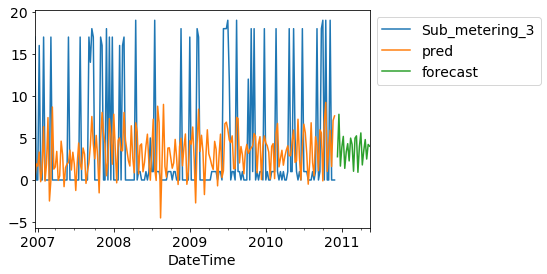

In [88]:
ts_data.plot()
model_fit.get_prediction().predicted_mean.plot(label='pred')
model_fit.get_forecast(steps=24).predicted_mean[1:].plot(label='forecast')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## New Forecasts

In [98]:
def build_ts_data(df, 
                  sub_meter_label = 'Sub_mtering_3', 
                  resample_frequency = 'W'):

    #add day of week column
    df.index = df['DateTime']
    
    #select only submeter 3
    for header in df.columns:
        if header != sub_meter_label:
         df = df.drop(columns=[header])
    
    #resample by week (resample ensures the frequency of the averaging is written to the df. groupby does not assign such infromation)
    df = df.resample(resample_frequency).mean()
    
    df[sub_meter_label] = df[sub_meter_label].fillna(0)
    
    df.index = df.index.tz_localize(None)
    
    ts_data = df[sub_meter_label]
    
    return ts_data

### Visualize data to find best resampling frequency

--- resample frequency: M ---


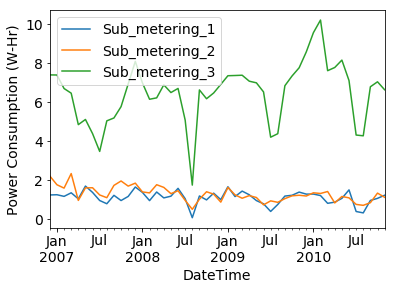

--- resample frequency: W ---


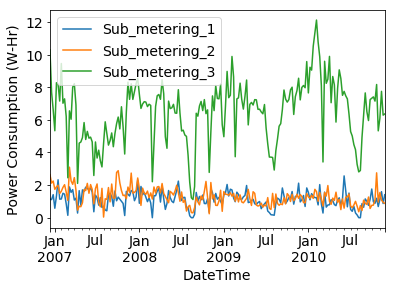

--- resample frequency: D ---


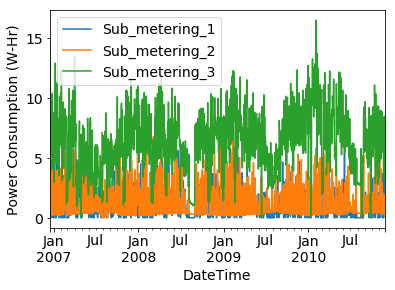

In [194]:
for frequency in ['M','W','D']:
    print('--- resample frequency:',frequency,'---')
    for header in ['Sub_metering_1','Sub_metering_2','Sub_metering_3']:
        ts_data = build_ts_data(df, header, frequency)
        ts_data.plot()
        plt.legend()
    plt.ylabel('Power Consumption (W-Hr)')
    plt.show()

Seems like the resampling by week frequency is the best trade-off between granularity of the data and visualizing meaningful trends

### Build the Models

#### Fetch Time Series

In [105]:
#define ts_data objects for each sub meter
frequency = 'W'
for header in ['Sub_metering_1','Sub_metering_2','Sub_metering_3']:
    globals()['ts_data_'+header] = build_ts_data(df, header, frequency)

#### Run Grid Search for SARIMA

In [111]:
for header in ['Sub_metering_1','Sub_metering_2','Sub_metering_3']:
    print('--------- Grid Search for:', header,'--------')
    globals()['pqdPQDm_mse_'+header] = SARIMA_grid_search(globals()['ts_data_'+header], pqdPQDm_list)
    
    #convert our list of results into a df
    globals()['df_pqdPQDm_mse_'+header] = pd.DataFrame(globals()['pqdPQDm_mse_'+header],columns = ['pqd','PQDm','mse'])

    #sort by mse and inspect the top 5 best models
    globals()['df_pqdPQDm_mse_'+header] = globals()['df_pqdPQDm_mse_'+header].sort_values('mse').reset_index(drop=True)

--------- Grid Search for: Sub_metering_1 --------
n tasks: 13608


[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Batch computation too fast (0.0546s.) Setting batch_size=6.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  70 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Batch computation too slow (2.0985s.) Setting batch_size=3.
[Parallel(n_jobs=8)]: Done 124 tasks      | elapsed:    3.5s
[Parallel(n_jobs=8)]: Done 187 tasks      | elapsed:    7.4s
[Parallel(n_jobs=8)]: Batch computation too slow (4.1383s.) Setting batch_size=1.
[Parallel(n_jobs=8)]: Done 219 tasks      | elapsed:    8.7s
[Parallel(n_jobs=8)]: Done 240 tasks      | elapsed:    9.6s
[Parallel(n_jobs=8)]: Done 258 tasks      | elapsed:   10.6s
[Parallel(n_jobs=8)]: Done 273 tasks      | elapsed:   11.4s
[Parallel(n_jobs=8)]: Done 293 tasks      | elapsed:   12.

[Parallel(n_jobs=8)]: Batch computation too fast (0.1792s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done 5525 tasks      | elapsed:  6.7min
[Parallel(n_jobs=8)]: Batch computation too fast (0.1963s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Batch computation too slow (2.0087s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Batch computation too slow (2.3786s.) Setting batch_size=1.
[Parallel(n_jobs=8)]: Done 5757 tasks      | elapsed:  6.9min
[Parallel(n_jobs=8)]: Done 5856 tasks      | elapsed:  7.0min
[Parallel(n_jobs=8)]: Done 5955 tasks      | elapsed:  7.2min
[Parallel(n_jobs=8)]: Done 6056 tasks      | elapsed:  7.4min
[Parallel(n_jobs=8)]: Batch computation too fast (0.1857s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Batch computation too fast (0.1961s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Batch computation too fast (0.0998s.) Setting batch_size=16.
[Parallel(n_jobs=8)]: Batch computation too slow (4.5491s.) Setting batch_size=8.
[Parallel(n_jobs=8)]: Done 6443 t

--------- Grid Search for: Sub_metering_2 --------
n tasks: 13608


[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Batch computation too fast (0.0728s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  19 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done  88 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Batch computation too slow (2.0401s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done 132 tasks      | elapsed:    3.6s
[Parallel(n_jobs=8)]: Done 172 tasks      | elapsed:    4.8s
[Parallel(n_jobs=8)]: Done 202 tasks      | elapsed:    6.1s
[Parallel(n_jobs=8)]: Done 230 tasks      | elapsed:    6.6s
[Parallel(n_jobs=8)]: Done 262 tasks      | elapsed:    8.2s
[Parallel(n_jobs=8)]: Done 292 tasks      | elapsed:    9.8s
[Parallel(n_jobs=8)]: Batch computation too slow (2.1409s.) Setting batch_size=

[Parallel(n_jobs=8)]: Done 5516 tasks      | elapsed:  5.4min
[Parallel(n_jobs=8)]: Batch computation too fast (0.1878s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Batch computation too slow (2.0634s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done 5745 tasks      | elapsed:  5.6min
[Parallel(n_jobs=8)]: Batch computation too slow (2.0033s.) Setting batch_size=1.
[Parallel(n_jobs=8)]: Done 5847 tasks      | elapsed:  5.7min
[Parallel(n_jobs=8)]: Done 5932 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done 6019 tasks      | elapsed:  6.0min
[Parallel(n_jobs=8)]: Batch computation too fast (0.1898s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Batch computation too fast (0.1846s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Batch computation too fast (0.0546s.) Setting batch_size=28.
[Parallel(n_jobs=8)]: Done 6156 tasks      | elapsed:  6.1min
[Parallel(n_jobs=8)]: Batch computation too slow (2.8638s.) Setting batch_size=14.
[Parallel(n_jobs=8)]: Batch computation too slow (26

--------- Grid Search for: Sub_metering_3 --------
n tasks: 13608


[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Batch computation too fast (0.0609s.) Setting batch_size=6.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  70 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Batch computation too slow (2.0409s.) Setting batch_size=3.
[Parallel(n_jobs=8)]: Done 124 tasks      | elapsed:    3.6s
[Parallel(n_jobs=8)]: Batch computation too slow (2.9942s.) Setting batch_size=1.
[Parallel(n_jobs=8)]: Done 178 tasks      | elapsed:    6.7s
[Parallel(n_jobs=8)]: Done 212 tasks      | elapsed:    7.8s
[Parallel(n_jobs=8)]: Done 229 tasks      | elapsed:    8.1s
[Parallel(n_jobs=8)]: Done 242 tasks      | elapsed:    8.9s
[Parallel(n_jobs=8)]: Done 262 tasks      | elapsed:   10.1s
[Parallel(n_jobs=8)]: Done 277 tasks      | elapsed:   10.

[Parallel(n_jobs=8)]: Done 6618 tasks      | elapsed:  7.2min
[Parallel(n_jobs=8)]: Batch computation too fast (0.1987s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Batch computation too fast (0.0437s.) Setting batch_size=18.
[Parallel(n_jobs=8)]: Batch computation too slow (5.0590s.) Setting batch_size=9.
[Parallel(n_jobs=8)]: Batch computation too slow (18.2471s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done 6990 tasks      | elapsed:  7.7min
[Parallel(n_jobs=8)]: Batch computation too slow (7.9683s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Batch computation too slow (5.2621s.) Setting batch_size=1.
[Parallel(n_jobs=8)]: Batch computation too fast (0.1825s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done 7231 tasks      | elapsed:  8.0min
[Parallel(n_jobs=8)]: Batch computation too fast (0.1817s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Batch computation too slow (2.3638s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Batch computation too slow (2.2227s.) Setting batch_

#### Display Top 5 Params

In [117]:
for header in ['Sub_metering_1','Sub_metering_2','Sub_metering_3']:
    print('\n---',header,'Top 5 Hyperparameters---')
    display(globals()['df_pqdPQDm_mse_'+header].head())


--- Sub_metering_1 Top 5 Hyperparameters---


pqd          PQDm       mse
0  (8, 1, 1)  (2, 0, 2, 6)  0.211866
1  (8, 1, 1)  (2, 0, 2, 3)  0.212327
2  (6, 1, 1)  (2, 0, 2, 3)  0.212406
3  (7, 1, 0)  (2, 0, 2, 3)  0.212535
4  (6, 1, 2)  (2, 0, 2, 3)  0.212640


--- Sub_metering_2 Top 5 Hyperparameters---


pqd          PQDm       mse
0  (2, 1, 1)  (2, 0, 2, 3)  0.241784
1  (8, 1, 2)  (2, 0, 2, 4)  0.242601
2  (7, 1, 2)  (2, 0, 2, 3)  0.243484
3  (8, 1, 2)  (1, 0, 2, 4)  0.243956
4  (8, 1, 2)  (2, 0, 2, 6)  0.244721


--- Sub_metering_3 Top 5 Hyperparameters---


pqd          PQDm       mse
0  (6, 0, 2)  (1, 0, 2, 2)  2.361565
1  (8, 0, 2)  (2, 0, 1, 2)  2.380840
2  (8, 1, 1)  (2, 0, 2, 4)  2.385019
3  (8, 1, 2)  (2, 0, 0, 4)  2.385734
4  (8, 1, 2)  (2, 0, 0, 2)  2.388879

#### Plot the predictions and forecast

--------Model Summary --------


<class 'statsmodels.iolib.table.SimpleTable'>

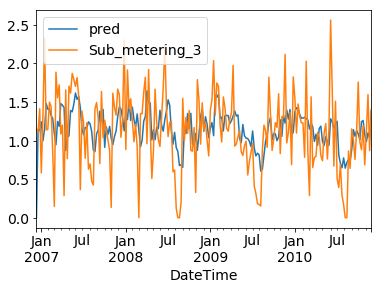

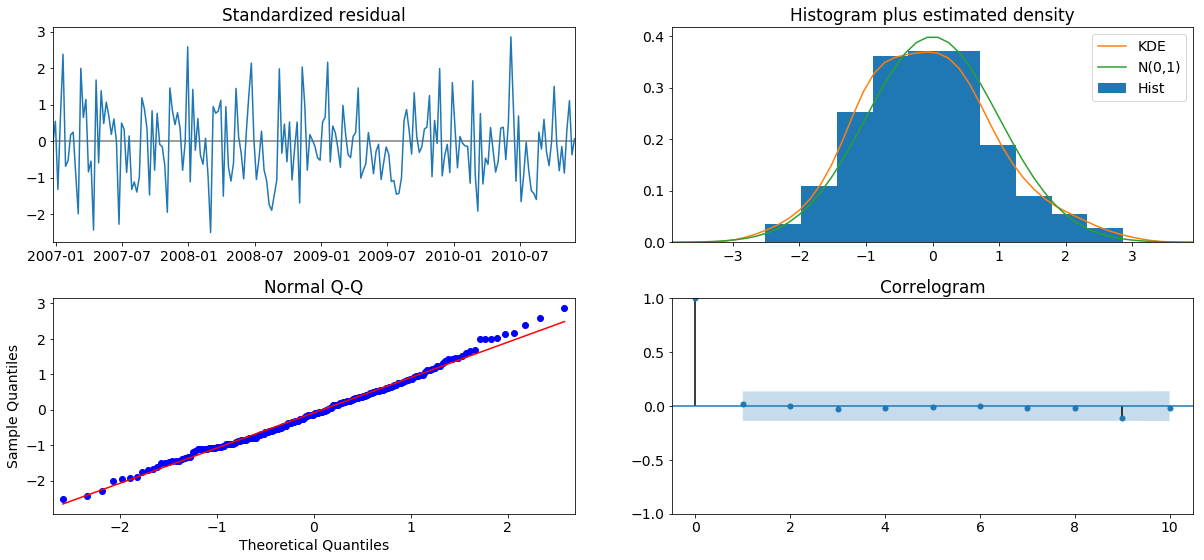

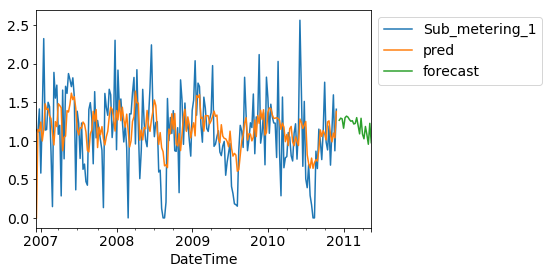

--------Model Summary --------


<class 'statsmodels.iolib.table.SimpleTable'>

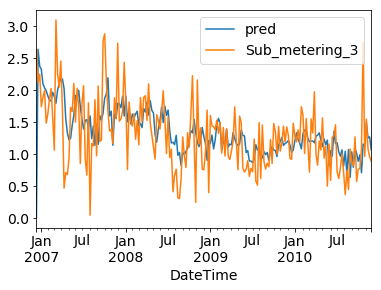

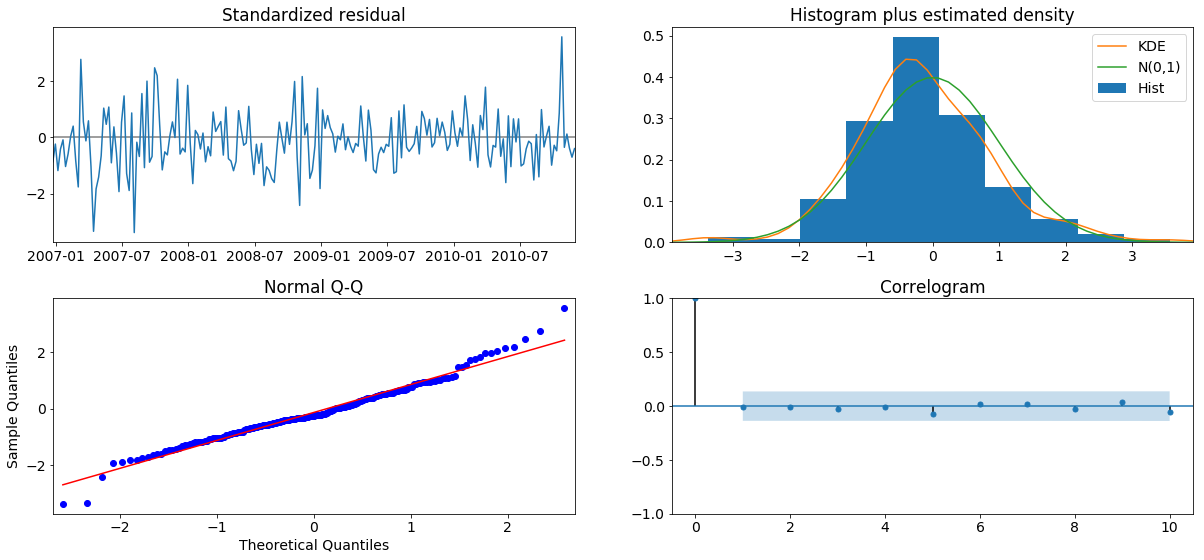

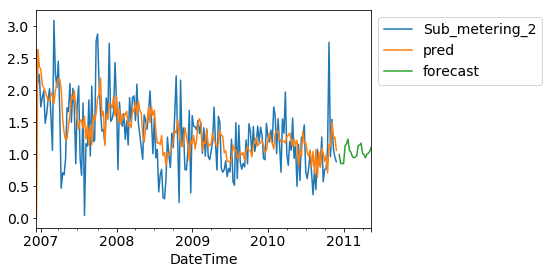

--------Model Summary --------


<class 'statsmodels.iolib.table.SimpleTable'>

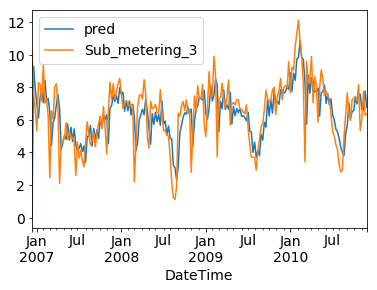

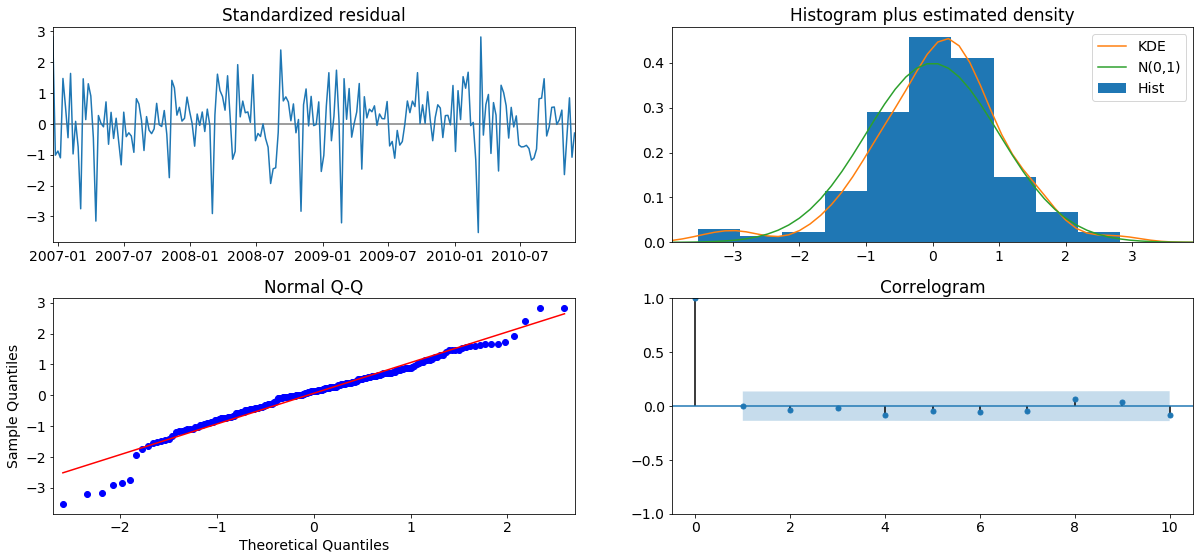

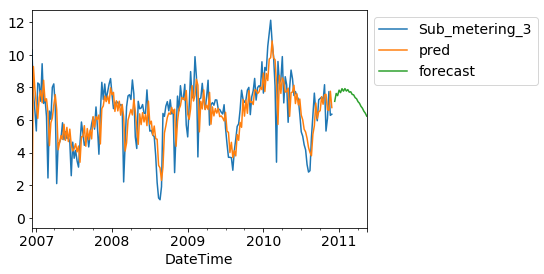

In [120]:
warnings.filterwarnings('ignore')
for header in ['Sub_metering_1','Sub_metering_2','Sub_metering_3']:
    pqd_best = globals()['df_pqdPQDm_mse_'+header]['pqd'][0]
    PQDm_best = globals()['df_pqdPQDm_mse_'+header]['PQDm'][0]

    globals()['model_'+header] = sm.tsa.SARIMAX(globals()['ts_data_'+header], 
                           order = pqd_best, 
                           seasonal_order=PQDm_best)
    globals()['model_fit_'+header] = globals()['model_'+header].fit(disp=0)

    plot_preds_and_Residuals(globals()['model_fit_'+header], model_type='SARIMA')
    
    #forecast with true and pred values
    globals()['ts_data_'+header].plot()
    globals()['model_fit_'+header].get_prediction().predicted_mean.plot(label='pred')
    globals()['model_fit_'+header].get_forecast(steps=24).predicted_mean[1:].plot(label='forecast')
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()
warnings.filterwarnings('default')

# Decomposing a Seasonal Time Series

According to Wikipedia: Seasonal adjustment is a statistical method for removing the seasonal component of a time series that exhibits a seasonal pattern. It is usually done when wanting to analyze the trend of a time series independently of the seasonal components. For example: It is normal to report seasonally adjusted data for unemployment rates to reveal the underlying trends in labor markets. Many economic phenomena have seasonal cycles, such as agricultural production. It is necessary to adjust for this component in order to understand what underlying trends are in the economy and so official statistics are often “seasonally adjusted” to remove seasonal components.

You created three different time series and related forecasts in the previous step, but how can we decompose these time series into useful components?

According to The Little Book of R:

“A seasonal time series consists of a trend component, a seasonal component and an irregular component. Decomposing the time series means separating the time series into these three components: that is, estimating these three components.”

In order to correctly estimate any trend and seasonal components that might be in your time series you need to use the decompose() function in the forecast package, which estimates the trend, seasonal, and irregular components of a time series.

When you use the sm.tsa.decompose() function, three different objects that can be accessed from the command line after running sm.tsa.decompose() on your time series.
* Trend component
* Seasonal component
* Residual component

The decomposition model can be based on additive or multiplicative seasonality, where each are defined as:
* Additive:  $x_t = Trend + Seasonal + Random$

* Multiplicative:  $x_t = Trend \times Seasonal \times Random$

The additive model is useful when the seasonal variation is relatively constant over time.
The multiplicative model is useful when the seasonal variation increases over time.
In the sub-metering data, the seasonal variation is relatively constant over time, so we will use an additive model.

## Decomposition

Visualizations and analysis needed for your report:

1. The sub-meter 1, 2, 3 decomposed plot
2. One comparison chart showing the summary statistics for the seasonal, trend and remainder components from each decomposed object

		---- Sub_metering_1 ----


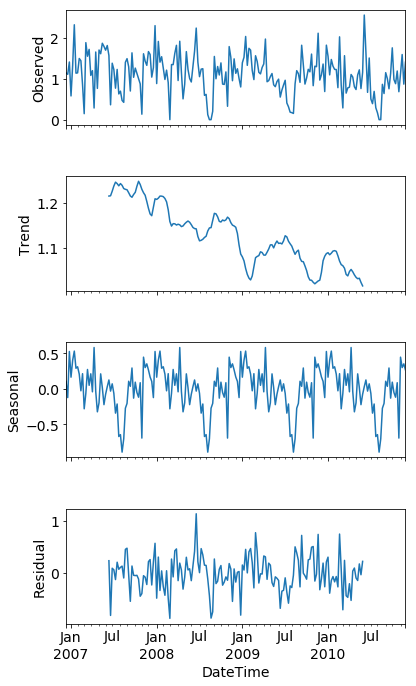

		---- Sub_metering_2 ----


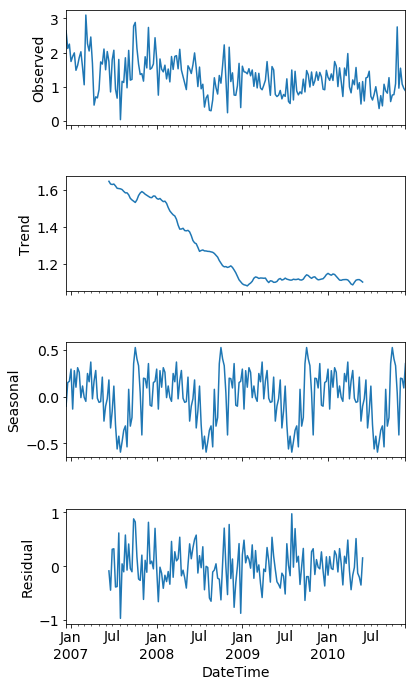

		---- Sub_metering_3 ----


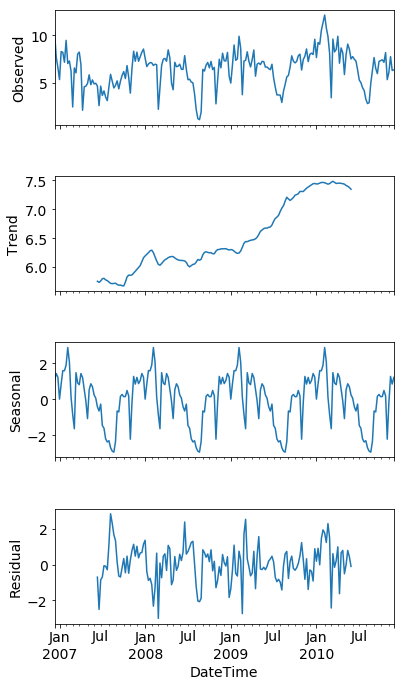

In [129]:
# perform initial seasonal decomposition and visualization
for header in ['Sub_metering_1','Sub_metering_2','Sub_metering_3']:
    print('\t\t----',header,'----')
    ts_data = globals()['ts_data_'+header]
    globals()['seasonal_decomp_'+header] = sm.tsa.seasonal_decompose(ts_data, model='additive')
    globals()['seasonal_decomp_'+header].plot()
    plt.tight_layout(rect=(0,0,1,2.5))
    plt.show()

Review your resulting plot. Does sub-meter 3 show a trend in power usage? Would this information be important to a homeowner trying to understand their power consumption? Does sub-meter 3 show seasonal effects on power usage? What may or may not cause this? 

<font color='red'> All sub meters show significant season trends. Basically we see the seasonal power consumption goes to a minimum around September then slowly peak around March. Essentially there is a 6 month cycle of rising power (sept-march) then falling power (march-sept). This likely corresponds to seasonal temperature/weather changes, where the temperature is most comfortable around September, so users don't require much power, while temperatures are the least comfortable around March, so more power is required. These trends could also be related to the amount of daylight throughout the year, since users likely consume less power when days are longer

# Holt-Winter Forecasting

To make forecasts using simple exponential smoothing, you can fit a simple exponential smoothing predictive model using the sm.tsa.holtwinters.ExponentialSmoothing() function from the statsmodels library.
* [statsmodels Tutorial](https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html)

## Remove Seasonal Components

To use HoltWinters() and forecasting you will first need to remove the seasonal component that you identified via decomposition.

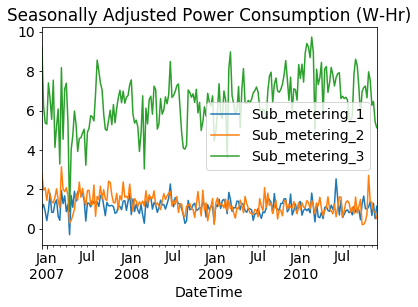

In [142]:
plt.title('Seasonally Adjusted Power Consumption (W-Hr)')
for header in ['Sub_metering_1','Sub_metering_2','Sub_metering_3']:
    globals()['ts_minus_seasonal_'+header] = globals()['ts_data_'+header] - globals()['seasonal_decomp_'+header].seasonal
    globals()['ts_minus_seasonal_'+header].plot(label=header)
plt.legend()
plt.show()

You really can't tell if seasonality has been removed by looking at the plot. Let's try decompose again and see if the  seasonal component was removed. 

		---- Sub_metering_1 ----


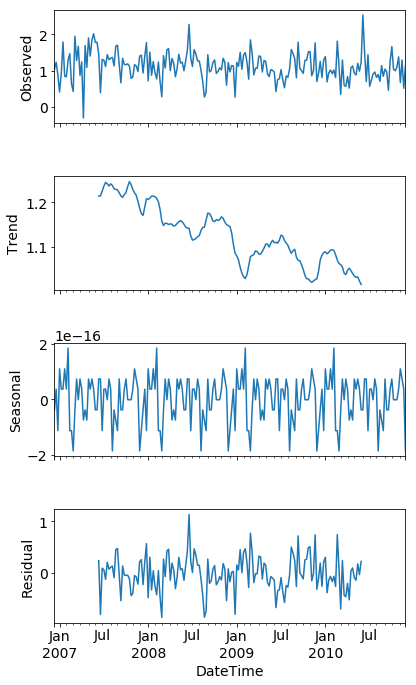

		---- Sub_metering_2 ----


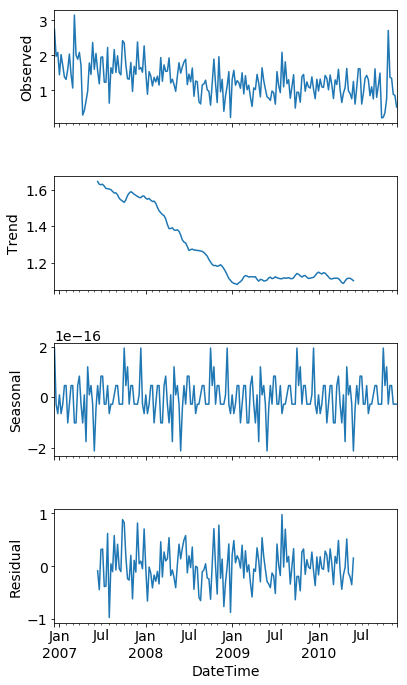

		---- Sub_metering_3 ----


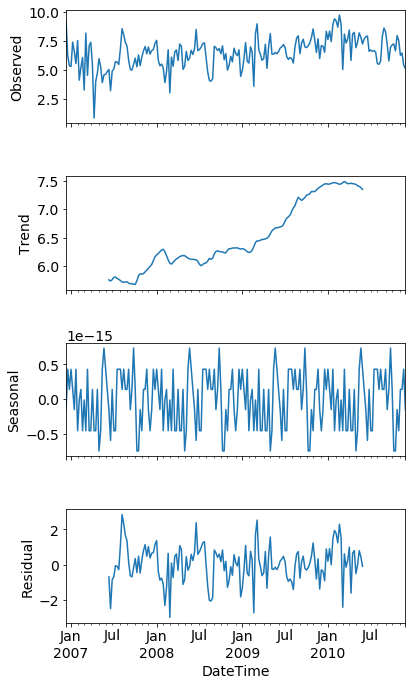

In [143]:
for header in ['Sub_metering_1','Sub_metering_2','Sub_metering_3']:
    print('\t\t----',header,'----')
    ts_data = globals()['ts_minus_seasonal_'+header]
    sm.tsa.seasonal_decompose(ts_data, model='additive').plot()
    plt.tight_layout(rect=(0,0,1,2.5))
    plt.show()

Yes there is a seasonal line, but looks like random noise.

## HoltWinters Simple Exponential Smoothing

Now that we have removed the seasonal component let's use HoltWinters simple exponential smoothing. 

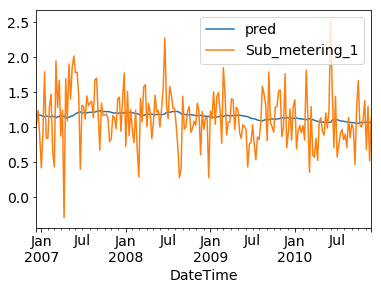

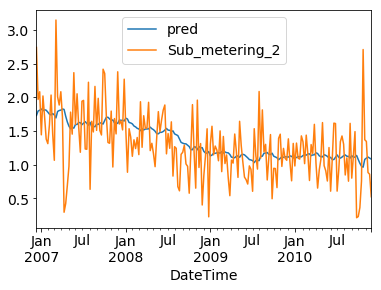

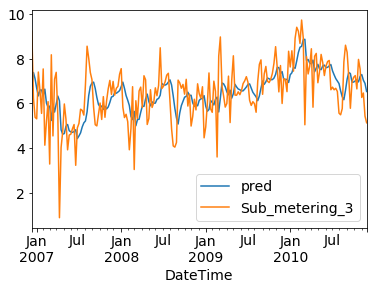

In [154]:
for header in ['Sub_metering_1','Sub_metering_2','Sub_metering_3']:
    ts_data = globals()['ts_minus_seasonal_'+header]
    model = sm.tsa.SimpleExpSmoothing(ts_data)
    model_fit = model.fit(smoothing_level=None, optimized=True)
    model_fit.predict(start=ts_data.index[0],
                      end=ts_data.index[0-1]).plot(label='pred')
    ts_data.plot(label=header)
    plt.legend()
    plt.show()

In the plot above the exponentially smooth fitted line is plotted in blue along with the original data points. How does exponential smoothing help? Consider the outliers. Consider the information we removed when we subsetted millions of data points to 52 observations per year. 

<font color='red'> The smoothing helps highlight the general trends more. Specifically, for meter 1, we see almost no change in seasonally adjusted weekly power consumption, while for meter 2 seasonally adjusted power increasing, and for meter 3 we see it increasing slightly, with a high degree of variance over time

## HoltWinters Forecast

Having created a ts object that contains exponentially smoothed data with no seasonality, let’s now use forecast again. 

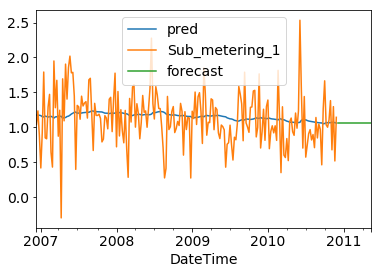

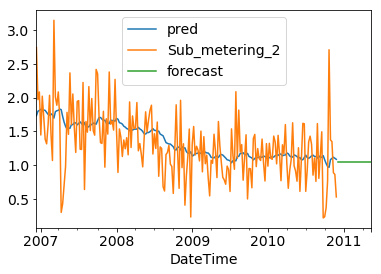

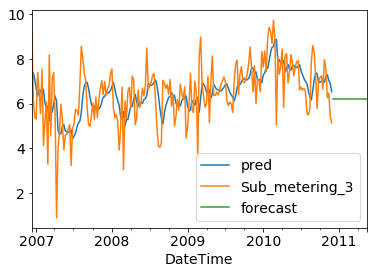

In [156]:
warnings.filterwarnings('ignore')
for header in ['Sub_metering_1','Sub_metering_2','Sub_metering_3']:
    ts_data = globals()['ts_minus_seasonal_'+header]
    model = sm.tsa.SimpleExpSmoothing(ts_data)
    model_fit = model.fit(smoothing_level=None, optimized=True)
    model_fit.predict(start=ts_data.index[0],
                      end=ts_data.index[0-1]).plot(label='pred')
    ts_data.plot(label=header)
    
    model_fit.forecast(steps=24).plot(label='forecast')
    
    plt.legend()
    plt.show()
warnings.filterwarnings('default')

Lastly, let's change the the confidence levels and then plot only the forecasted area. Think of this just as you would when a weatherperson forecasts the weather: They don't include the preceding years, weeks and days. 

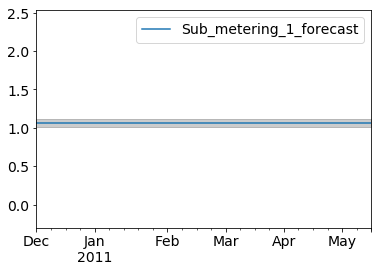

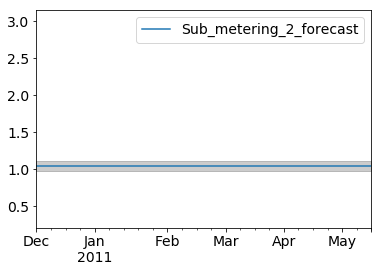

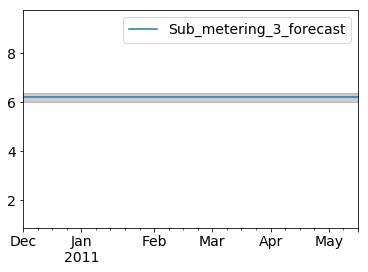

In [192]:
warnings.filterwarnings('ignore')
for header in ['Sub_metering_1','Sub_metering_2','Sub_metering_3']:
    ts_data = globals()['ts_minus_seasonal_'+header]
    model = sm.tsa.SimpleExpSmoothing(ts_data)
    model_fit = model.fit(smoothing_level=None, optimized=True)
    
    forecast = model_fit.forecast(steps=24)
    forecast.plot(label=header+'_forecast')
    
    def calc_conf_int(ts_data, confidence=0.95):
        import scipy.stats
        n = len(ts_data)
        m, se = np.mean(ts_data), scipy.stats.sem(ts_data)
        h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
        return h
    
    conf_int = calc_conf_int(ts_data)
    plt.fill_between(forecast.index, forecast-conf_int, forecast+conf_int, 
                     color='k', alpha=.2)
    plt.ylim((ts_data.min(),ts_data.max()))
    plt.legend()
    plt.show()
warnings.filterwarnings('default')

# Produce the Report to Management

You are to create a PowerPoint report that will be presented to a management team and used to drive decisions about energy usage through analysis and forecasting.

1. Step One Visualizations with Analysis. Minimum of 3 consisting of Day, Week and a time period of your choice.
2. Step Two Time Series Visualizations with Analysis. Minimum of 3 consisting of sub-meters 1, 2 and 3.
3. Step Three Linear Regression Forecast Visualizations with Analysis. Minimum of 3 consisting of sub-meters 1, 2 and 3. Also include the chart you built comparing the R2 and RMSE of each model.
4. Step Four Decomposition Visualizations with Analysis. Minimum of 3 consisting of sub-meters 1, 2 and 3. Also include the chart you built comparing the summary statistics for the seasonal, trend and remainder components from each decomposed object
5. Step Five Holt Winters Forecasting and Analysis. Minimum of 3 sets consisting of sub-meters 1, 2 and 3. Each set is composed from the forecast plot and plot containing only the forecasted area.
6. Any useful correlations or predictions you can glean from the data. If none can be found or if the relationships are weak, suggest other types of data you believe might be needed to improve the analysis
7. A summary statement that addresses the goal of this project. Has the goal been met? 
8. Five business recommendations you can suggest based on your visualization and analysis of the power consumption data. Include justifications of your recommendations
9. One or more slides discussing lessons learned.

__TIP:__

Remember that it is your job as the data analyst not simply to do a bunch of analyses but more importantly to tell management what insight can be gained from the data they have provided to you.